# Chocolate Bar Ratings Dataset

In this assignment you will use a dataset with the ratings of several chocolate bars produced by companies located in different parts of the world. The dataset is a pre-processed version of the original dataset that can be found following this [link](https://www.kaggle.com/rtatman/chocolate-bar-ratings).

Your focus will be on the ratings of chocolate bars produced in the UK and Switzerland. The ratings are in the range of 1-5; the higher the better.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

In [1]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

### Dataset and variables

**1. Load the dataset called `flavors_cacao.csv` into a DataFrame**

Store the answer in a variable called `choco_df` and call the `.head()` method to view the first 5 rows.

In [2]:
# Add your code below
df = pd.read_csv('./data/flavors_cacao.csv')

choco_df = df
choco_df.head()

,company,species,REF,review_year,cocoa_p,company_location,rating,country
0,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,0.75,Switzerland,3.75,Indonesia
1,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",502,2010,0.75,Switzerland,2.75,Madagascar
2,Akesson's (Pralus),"Monte Alegre, D. Badero",508,2010,0.75,Switzerland,2.75,Brazil
3,Artisan du Chocolat,"Trinidad, Heritage, Limited ed.",1193,2013,0.72,U.K.,3.25,Trinidad
4,Artisan du Chocolat,"Colombia, Casa Luker",947,2012,0.72,U.K.,3.75,Colombia


**2. Using the `.loc` method, select the column `rating` for the rows of `df` where `company_location` equals `"U.K."`**

Store it in a variable called `uk_ratings`.

Your answer should be a Pandas Series.

In [3]:
uk_ratings = df.loc[:,'rating'][df.company_location == 'U.K.']
uk_ratings

3      3.25
4      3.75
5      4.00
6      2.75
7      1.75
       ... 
129    1.50
130    3.50
131    5.00
132    3.00
133    3.25
Name: rating, Length: 96, dtype: float64

**3. Using the `.loc` method, select the column `rating` for the rows of `df` where `company_location` equals `"Switzerland"`**

Store it in a variable called `swiss_ratings`

In [4]:
# Add your code below
swiss_ratings = df.loc[:, 'rating'][df.company_location == 'Switzerland']
len(swiss_ratings)

38

**4. How many rows are in `uk_ratings`?** 

Store your answer in a variable called `uk_rows`

In [5]:
# Add your code below
uk_rows = len(uk_ratings)
uk_rows

96

**5. What is the mean rating of the chocolate produced by companies in the UK?** 

Store your answer in a variable called `uk_mean_rating`

In [6]:
# Add your code below
uk_mean_rating = uk_ratings.mean()
uk_mean_rating


3.0729166666666665

**6. What is the median rating of the chocolate produced by companies in the UK?** 

In [7]:
# Add your code below
uk_median_rating = uk_ratings.median()
uk_median_rating

3.0

**7. What is the Standard Error of the Mean (SEM) of the ratings of the chocolates produced by UK companies?** 

Store your answer in a variable called `uk_ratings_sem`

*Hint: You can use the scipy `stats.sem` function*

In [8]:
# Add your code below
uk_ratings_sem = stats.sem(uk_ratings)
uk_ratings_sem

0.05887708663316619

**8. How many rows are in `swiss_ratings`?** 

Store your answer in a variable called `swiss_rows`

In [9]:
# Add your code below
swiss_rows = len(swiss_ratings)
swiss_rows

38

**9. What is the mean rating of the chocolate produced Swiss companies?** 

Store your answer in a variable called `swiss_mean_rating`

In [10]:
# Add your code below
swiss_mean_rating = swiss_ratings.mean()
swiss_mean_rating

3.401315789473684

**10. What is the median rating of the chocolate produced Swiss companies?** 

Store your answer in a variable called `swiss_median_rating`

In [11]:
# Add your code below
swiss_median_rating = swiss_ratings.median()
swiss_median_rating

3.5

**11. What is the Standard Error of the Mean (SEM) of the ratings of the chocolate produced Swiss companies?** 

Store your answer in a variable called `swiss_ratings_sem`

*Hint: You can use the scipy `stats.sem` function*

In [12]:
# Add your code below
swiss_ratings_sem = stats.sem(swiss_ratings)
swiss_ratings_sem

0.08461877614533614

**12. Use box plots to compare ratings from the UK and Switzerland**


Use `sns.boxplot` to plot `rating` against `company_location` in order to compare national ratings. Ensure you save your plot to the variable `ratings_comp`.

* Ensure the plot has the x-label 'Rating'
* Ensure the plot has the y-label 'Location'


Text(0, 0.5, 'Location')

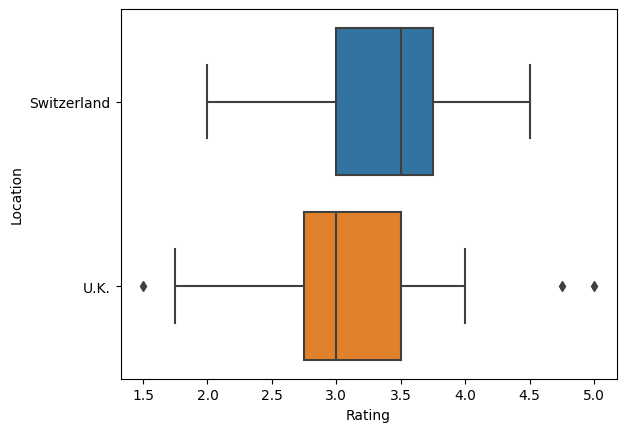

In [13]:
# Add your code below
ratings_comp = sns.boxplot(data=df, x='rating', y='company_location')
plt.xlabel('Rating')
plt.ylabel('Location')

### Outlier detection

**Are there any outliers in our data that might be skewing our statistics?**

An outlier is an extreme value that lies outside the overall pattern of the data.

There are a number of different ways of determining outliers, depending on the nature of the data and the calculations that you are asked to carry out.

Here we will use the definition that an outlier is any value that is:
- either greater than $Q_{3} + 1.5(Q_{3}-Q_{1})$
- or less than $Q_{1} - 1.5(Q_{3}-Q_{1})$

where $Q_{3}$ is the upper quartile, and $Q_{1}$ is the lower quartile.

<blockquote> Note: This is the default criteria in Seaborn used to mark outliers on boxplot diagrams like the one you created in the previous question </blockquote>

**13. Define a function `find_outliers` which takes a dataframe as input and as output will return a list called `outliers` containing the outliers in the ratings which are determined using the  the above criteria. The dataframe can be assumed to be of the same format as `df` and contain a `rating` column.**

*Hint: You can find Q3 and Q1 using the below  code*
```python
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
```

In [14]:
# Add your code below
def find_outliers(df):
    outliers = []
    Q1 = df['rating'].quantile(0.25)
    Q3 = df['rating'].quantile(0.75)
    interq_range = Q3 - Q1
    lowerbound = Q1 -(1.5*interq_range)
    ubound = Q3 +(1.5*interq_range)
    for i in df['rating']:
        if i > ubound:
            outliers.append(i)
        elif i < lowerbound:
            outliers.append(i)
    return outliers        


In [15]:
find_outliers(df)

[4.75, 1.5, 5.0]

**14. Use your function to determine the outliers in the `choco_df` data, first filtering the dataframe so it contains only ratings from the UK**

Store your answer (the output of the `find_outliers` function) in a variable called `uk_outliers`

In [16]:
# Add your code below

choco_df.country.value_counts()

choco_df1 = choco_df[choco_df['company_location'] == 'U.K.']


uk_outliers = find_outliers(choco_df1)
# uk_outliers = find_outliers(chol_ratings)
# uk_outliers


**Well done for completing the assignment! As well as being able to calculate statistics, review distributions and graphs, it is also important to develop an understanding of what information we can draw from all of this. Post a comment to the Knowledge Base about a conclusion that you have been able to draw from the data as part of your work above.**